In [3]:
# Python 3.5 or greater
import sys
assert sys.version_info >= (3, 5)
# scikit learn
import sklearn
assert sklearn.__version__>= "0.20"

# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

import shutil

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
DOWNLOAD_ROOT = "https://www.kaggle.com/datasets/zynicide/wine-reviews"
WINE_PATH = os.path.join("../data/")
WINE_URL = DOWNLOAD_ROOT + "datasets/wine-reviews/wine-reviews.zip"

def fetch_wine_data(wine_url=WINE_URL, wine_path=WINE_PATH):
    os.makedirs(wine_path, exist_ok=True)
    zip_path = os.path.join(wine_path, "wine-reviews.zip")
    urllib.request.urlretrieve(wine_url, zip_path)
    wine_zip = tarfile.open(zip_path)
    wine_zip.extractall(path=wine_path)
    wine_zip.clse()

    # tgz_path = os.path.join(wine_path, "archive.zip")
    # urllib.request.urlretrieve(wine_url, tgz_path)
    # wine_tgz = tarfile.open(tgz_path)
    # wine_tgz.extractall(path=wine_path)
    # wine_tgz.close()

In [5]:
# fetch_wine_data()

In [6]:
def load_wine_data(wine_path=WINE_PATH):
    csv_path = os.path.join(wine_path, "winemag-data_first150k.csv")
    return pd.read_csv(csv_path)

In [7]:
wine = load_wine_data()
wine.head() # gives the first 5 lines of the dataFrame

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


The `unnamed` column is the number of entries that have been made. Therefor any column that does not have 150,930 entries has at least 1 null entry.

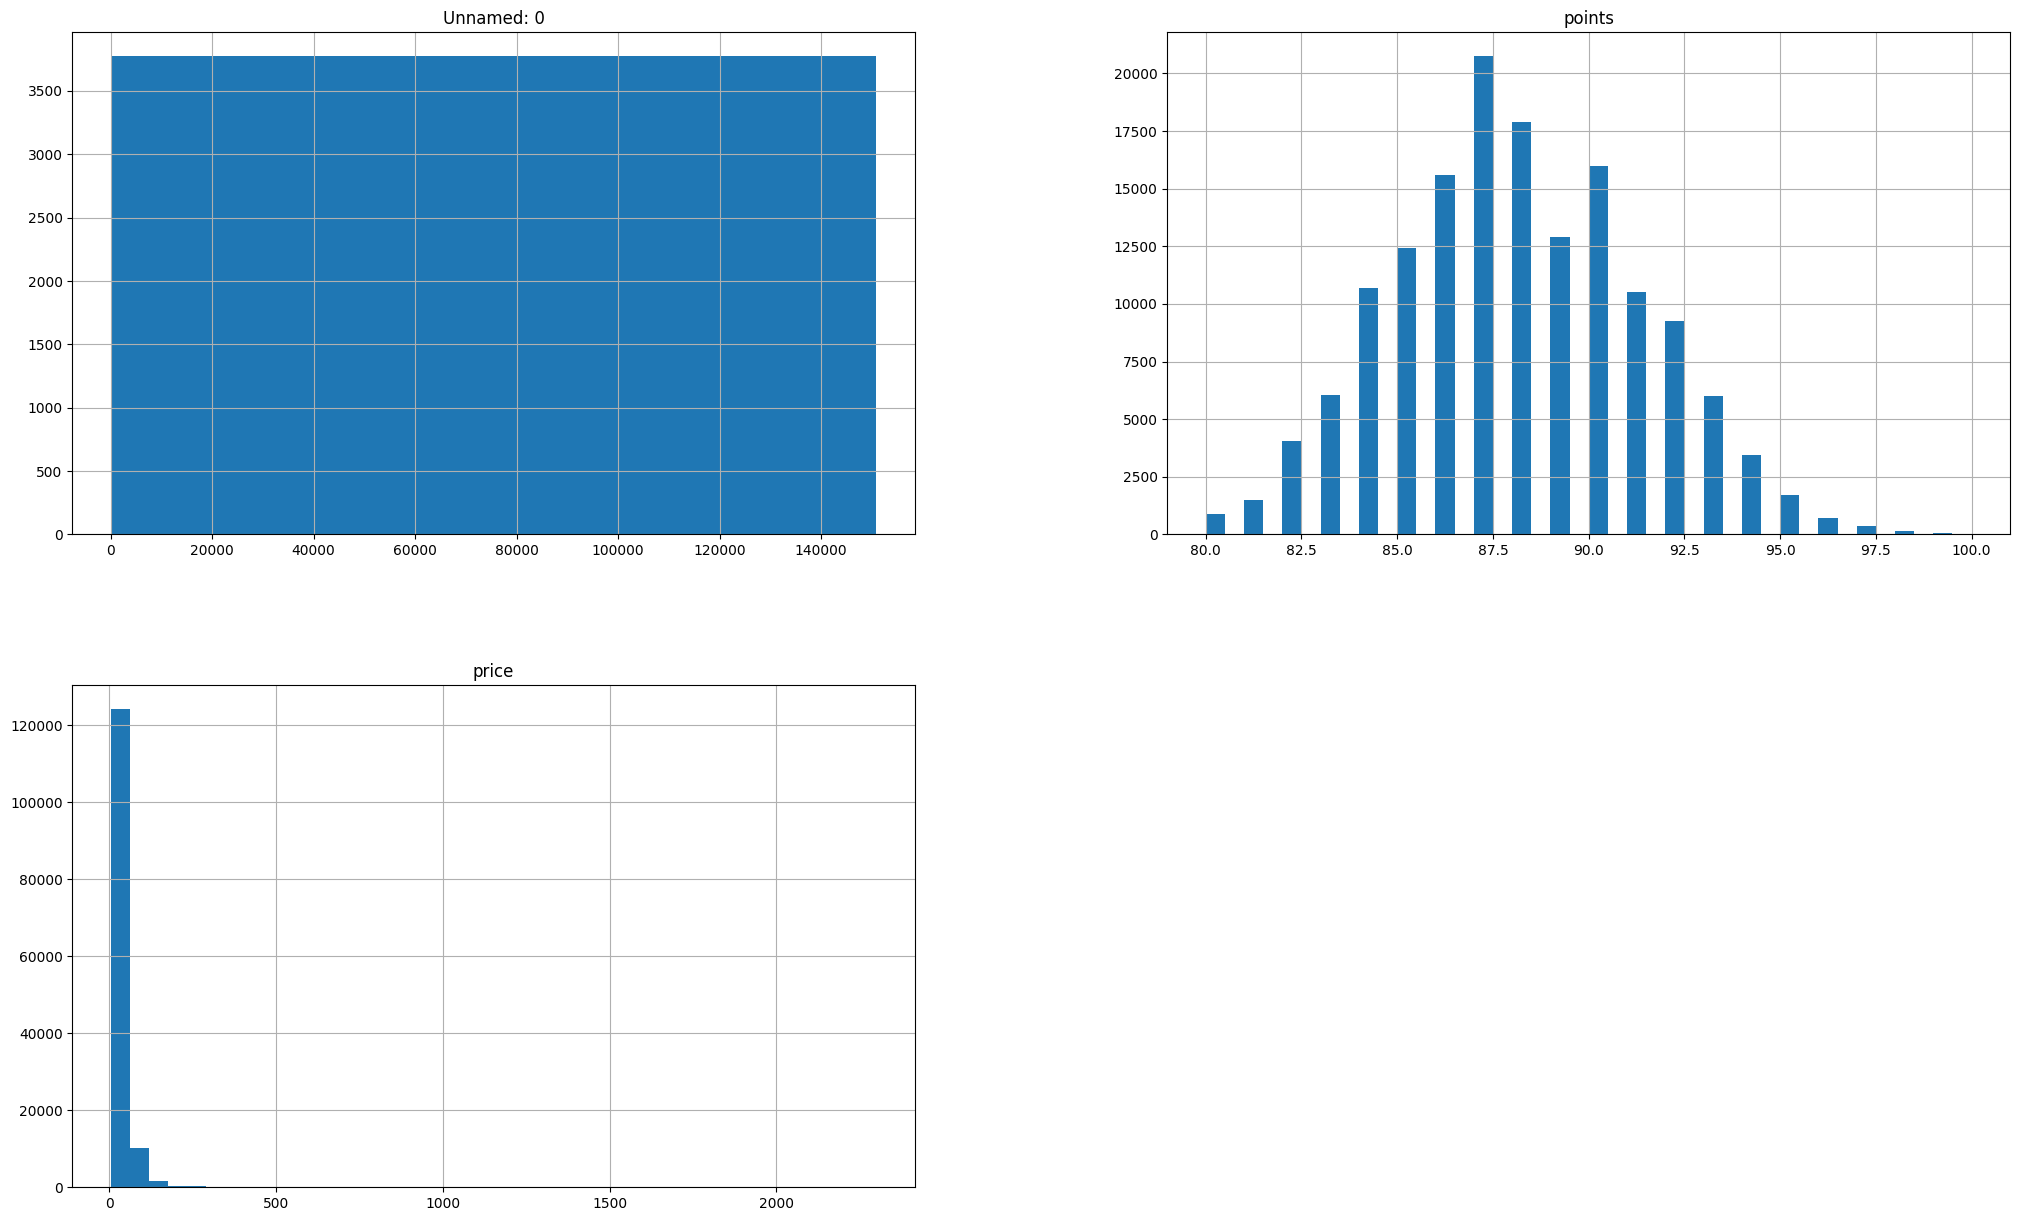

In [9]:
wine.hist(bins=40, figsize=(25, 15))
plt.show()

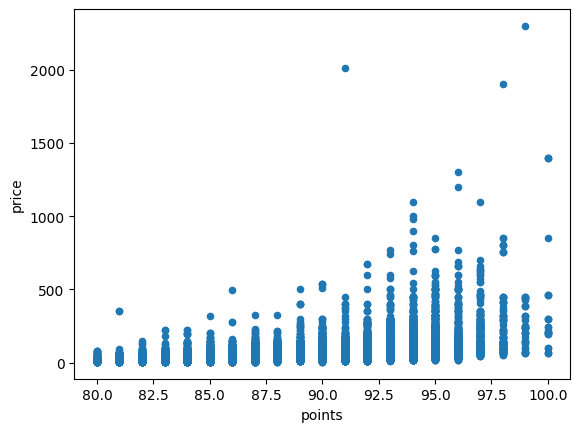

In [10]:
wine.plot(kind = "scatter", x = "points", y = "price")
plt.show()

In [11]:
# Create copy of winemag-data_first150k
def create_copy_file(wine_path=WINE_PATH):
    # Create a copies directory
    os.makedirs(wine_path + "/copies")
    csv_path = os.path.join(wine_path, "winemag-data_first150k.csv")
    df = pd.read_csv(csv_path)
    df.to_csv(wine_path + "/copies/winemag-data_first150k-copy.csv")



In [13]:
# create_copy_file()

In [14]:
# Our points range from 80 - 100
# So we can split this up into Equal Width Binning (EWB(4))
# Low, Medium, High, Very High

# This might not be correct, it seems to be giving the same records for medium, high and very high at the end record 150k+

def discretize_points(point_rating, wine_path=WINE_PATH):
    csv_path = os.path.join(WINE_PATH, "copies", "winemag-data_first150k-copy.csv")
    df = pd.read_csv(csv_path)

    if point_rating == "low":
        df["points"].mask(df["points"] <= 85, "low", inplace=True)
    elif point_rating == "medium":
        df["points"].mask(df["points"] <= 90, "medium", inplace=True)
    elif point_rating == "high":
        df["points"].mask(df["points"] <= 95, "high", inplace=True)
    elif point_rating == "very high":
        df["points"].mask(df["points"] <= 100, "very high", inplace=True)
    else:
        print("NOT VALID")

    # df.loc[(df.points <= 85), 'points']="low"
    # df.loc[(df.points <= 90), 'points']="medium"

    # Can also write to the copied csv file if we wish to save this change
    return df


wine_copy = discretize_points("low")

# wine_copy.loc[(wine_copy.points <= 85), 'points']="low" # This replaces all of the points values with less than 86 to a string of 'low'

wine_copy.query("points == 'low'")


,Unnamed: 0.1,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
725,725,725,US,"While light in color, this wine is flavorful a...",Saluté,low,15.0,California,Livermore Valley,Central Coast,Red Blend,Rubino Estates Winery
726,726,726,France,This pale rosé blend of Cabernet Sauvignon and...,Bélingard,low,9.0,Southwest France,Bergerac Rosé,NaN,Rosé,Château Bélingard
727,727,727,France,This is the second label from this Gaillac est...,Les Petits Clément Merlot Duras,low,16.0,Southwest France,Côtes du Tarn,NaN,Red Blend,Château Clément Termes
728,728,728,US,A hint of maple syrup in the aromas and flavor...,NaN,low,15.0,California,California,California Other,Cabernet Sauvignon,Jack's House
729,729,729,France,"A blend of 30% Pinot Noir and 70% Gamay, this ...",NaN,low,18.0,Burgundy,Coteaux Bourguignons,NaN,Pinot Noir-Gamay,Joseph Drouhin
...,...,...,...,...,...,...,...,...,...,...,...,...
150901,150901,150901,Chile,"Lavishly oaked, the fruit here struggles to ma...",Reserva,low,12.0,Maipo Valley,NaN,NaN,Merlot,Undurraga
150902,150902,150902,Chile,This medium weight Chardonnay offered aromas o...,Estate Bottled,low,10.0,Maipo Valley,NaN,NaN,Chardonnay,De Martino
150903,150903,150903,Chile,Very light berry and mint aromas open this aus...,120,low,7.0,Rapel Valley,NaN,NaN,Cabernet Sauvignon,Santa Rita
150904,150904,150904,Chile,A lot of Chilean Cabernets seem to have a dist...,NaN,low,10.0,Maipo Valley,NaN,NaN,Cabernet Sauvignon,De Martino


In [15]:
wine_copy = discretize_points("medium")
wine_copy.query("points == 'medium'")

,Unnamed: 0.1,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
30,30,30,Bulgaria,This Bulgarian Mavrud presents the nose with s...,Bergulé,medium,15.0,Bulgaria,NaN,NaN,Mavrud,Villa Melnik
31,31,31,US,"Steely and perfumed, this wine sees only 20% n...",Babushka,medium,37.0,California,Russian River Valley,Sonoma,Chardonnay,Zepaltas
32,32,32,Italy,"Underbrush, scorched earth, menthol and plum s...",Vigna Piaggia,medium,NaN,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Abbadia Ardenga
33,33,33,France,"Pale in color, this is nutty in character, wit...",Nonpareil Trésor Rosé Brut,medium,22.0,France Other,Vin Mousseux,NaN,Sparkling Blend,Bouvet-Ladubay
34,34,34,US,"The aromas entice with notes of wet stone, hon...",Conner Lee Vineyard,medium,42.0,Washington,Columbia Valley (WA),Columbia Valley,Chardonnay,Buty
...,...,...,...,...,...,...,...,...,...,...,...,...
150910,150910,150910,France,Scents of graham cracker and malted milk choco...,NaN,medium,38.0,Burgundy,Chambolle-Musigny,NaN,Pinot Noir,Michel Gros
150911,150911,150911,France,"This needs a good bit of breathing time, then ...",Les Chaliots,medium,37.0,Burgundy,Nuits-St.-Georges,NaN,Pinot Noir,Michel Gros
150912,150912,150912,France,The nose is dominated by the attractive scents...,Les Charmes,medium,65.0,Burgundy,Chambolle-Musigny,NaN,Pinot Noir,Daniel Rion
150928,150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,medium,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [16]:
wine_copy = discretize_points("high")


wine_copy.query("points == 'high'")

,Unnamed: 0.1,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
4,4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,high,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,high,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,high,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,high,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,8,US,This re-named vineyard was formerly bottled as...,Silice,high,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
...,...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,high,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,high,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,high,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,high,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [17]:
wine_copy = discretize_points("very high")

wine_copy.query("points == 'very high'")

,Unnamed: 0.1,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,very high,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,very high,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,very high,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,very high,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,very high,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,very high,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,very high,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,very high,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,very high,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset
